<a href="https://colab.research.google.com/github/pas3n7/ColabDataScienceLearning/blob/main/pytorchmnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=i2yPxY2rOzs

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
def showgrid(atensor, gridside=4):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.concatenate([atensor[i:i+gridside].view((28*gridside, 28)) for i in range(0, gridside**2, gridside)], axis=1))
    plt.show()

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
total = 0
counter_dict = {i:0 for i in range(10)}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100:2f}")

0: 9.871667
1: 11.236667
2: 9.930000
3: 10.218333
4: 9.736667
5: 9.035000
6: 9.863333
7: 10.441667
8: 9.751667
9: 9.915000


In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #1st fully connected layer , images are 28x28
        self.fc2 = nn.Linear(64, 64) #hidden layer
        self.fc3 = nn.Linear(64, 64) #hidden layer
        self.fc4 = nn.Linear(64, 10) #output layer

    def forward(self, x):
        #input is x
        x = self.fc1(x) #x passes through fc1, we redefine x then...
        x = F.relu(x) #activation function
        x = self.fc2(x) #then passes through fc2
        x = F.relu(x)
        x = self.fc3(x) #etc
        x = F.relu(x)
        x = self.fc4(x) #etc, relu doesn't make sense for output
        #for output we want a probability distribution, because we have multiple classes to match
        return F.log_softmax(x, dim=1) #dim 1, will be flat


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
X = torch.rand((28, 28))

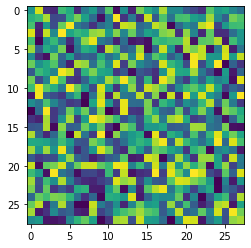

In [10]:
plt.imshow(X)

In [11]:
output = net(X.view(-1,28*28))  #-1 tells it to accept anything, in this case, any number of images

In [12]:
output

tensor([[-2.4260, -2.3823, -2.2109, -2.1994, -2.2895, -2.3530, -2.2590, -2.3523,
         -2.2476, -2.3318]], grad_fn=<LogSoftmaxBackward>)

In [13]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 6

In [14]:
for epoch in range(EPOCHS):
    for data in trainset:
        #Data is a batch of featuresets and Labels
        X, y = data
        net.zero_grad() #want to zero out the gradient in every batch
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        # plt.imshow(X[0].view((28,28)))
        # plt.show()
        # print(y[0])
        #loss functions: if one hot vector: mean squared error
        #here, our metrics are a single value (the written number), we use nll
        loss.backward() #magic
        optimizer.step() #optimize
    print(loss)

tensor(0.0436, grad_fn=<NllLossBackward>)
tensor(0.1139, grad_fn=<NllLossBackward>)
tensor(0.4118, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)
tensor(0.0178, grad_fn=<NllLossBackward>)
tensor(0.0033, grad_fn=<NllLossBackward>)


In [158]:
conf = []

net.eval()
with torch.no_grad():
    for num in test:
        output = net(num[0].view(-1, 28*28))
        conf.append(output.max())


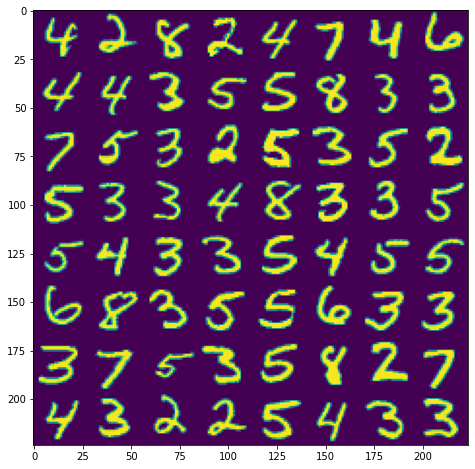

In [217]:
plt.figure(figsize=(8,8))
i=8
plt.imshow(torch.cat(tuple(test.data[torch.as_tensor(conf).argsort()][-i**2:].view(i, i*28, 28)), dim=1))


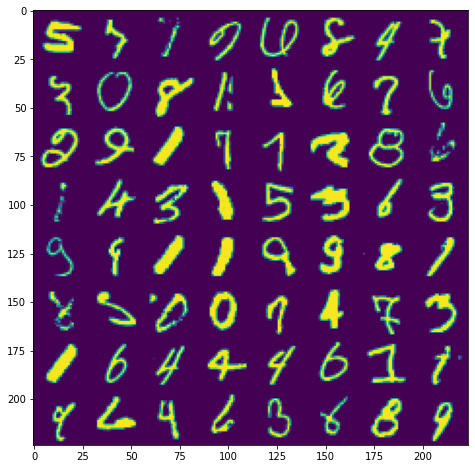

In [218]:
plt.figure(figsize=(8,8))
i=8
plt.imshow(torch.cat(tuple(test.data[torch.as_tensor(conf).argsort()][:i**2].view(i, i*28, 28)), dim=1))